In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

A. Load dataset. The quantity and quality of your data dictate how accurate your model will be. Select your dataset thoroughly and load it to the dataframe. You can use one or several sources



In [2]:
#I have chosen data called Spaceship Titanic from Kaggle
train_df = pd.read_csv('./dataset/train.csv')
# test_df = pd.read_csv('./dataset/test.csv')

 B. Exploratory Data Analysis. Analyze the data description, identify main characteristic of output and data attributes, produce analytical summary report identify outlier values and skewness of distribution of data, provide the summary statistics for your dataset. 

In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_df.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<AxesSubplot:>

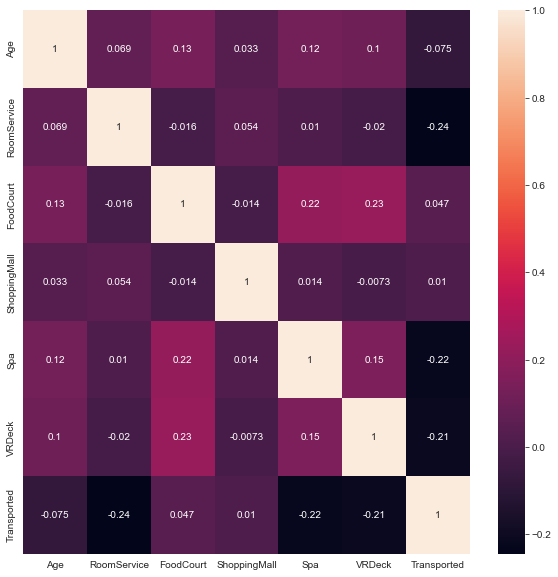

In [6]:
coorrelation = train_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(coorrelation, annot=True)

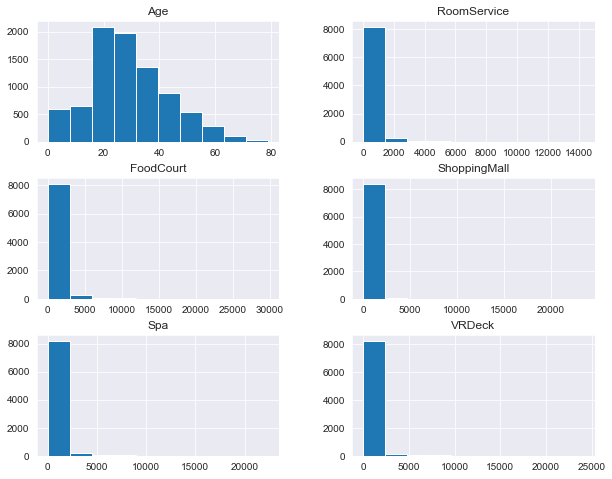

In [7]:
train_df.hist(figsize=(10, 8))
plt.show()

C. Data Preparation. You need to prepare your data for training. You may need to clean the data, remove duplicates, correct errors, deal with missing values, normalization and data type conversions. You may also engineer features during this step, depending on the needs of your analysis. The dataset should be split into the training and evaluation sets.  

In [8]:
print('Number of duplicated date: ', train_df.duplicated().sum())
columns = train_df.columns
for column in columns:
    print(column, ':', train_df[column].nunique(), ',', train_df[column].dtype)
#dropping no need columns like PassengerId, Cabin, Name
df = train_df.drop(columns=['PassengerId', 'Cabin', 'Name'])

Number of duplicated date:  0
PassengerId : 8693 , object
HomePlanet : 3 , object
CryoSleep : 2 , object
Cabin : 6560 , object
Destination : 3 , object
Age : 80 , float64
VIP : 2 , object
RoomService : 1273 , float64
FoodCourt : 1507 , float64
ShoppingMall : 1115 , float64
Spa : 1327 , float64
VRDeck : 1306 , float64
Name : 8473 , object
Transported : 2 , bool


Feature engineering

In [9]:
print('missing proportion')
print(df.isna().sum() / len(df))
df = df.dropna()

missing proportion
HomePlanet      0.023122
CryoSleep       0.024963
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Transported     0.000000
dtype: float64


In [10]:
#transforming object columns into int
df.HomePlanet = df.HomePlanet.replace('Europa', 0).replace('Earth', 1).replace('Mars', 2)
df.CryoSleep = df.CryoSleep.replace(False, 0).replace(True, 1)
df.Destination = df.Destination.replace('TRAPPIST-1e', 0).replace('PSO J318.5-22', 1).replace('55 Cancri e', 2)
df.VIP = df.VIP.replace(False, 0).replace(True, 1)
df.Transported = df.Transported.replace(False, 0).replace(True, 1)


In [11]:
# print(df.info())
df.describe(include='all')

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000,6923.000000
mean,0.951033,0.353748,0.522750,28.891665,0.024411,226.079590,480.432760,179.328037,318.185035,303.768309,0.503106
std,0.676770,0.478167,0.823237,14.514540,0.154334,673.908258,1672.766209,633.614987,1159.247480,1125.448364,0.500026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,38.000000,0.000000,49.000000,81.500000,29.000000,65.500000,51.000000,1.000000
max,2.000000,1.000000,2.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,20336.000000,1.000000


In [12]:
y = df.Transported
X = df.drop(columns=['Transported'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#Model 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model1 = LogisticRegression(C=1, penalty='l1', solver='liblinear')

model1.fit(X_train_scaled, y_train)


LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [14]:
#model 2
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3)
model2.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3)

In [15]:
#model 3
model3 = RandomForestClassifier(n_estimators=30, max_depth=9, criterion='entropy')
model3.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=30)

Test score for model 1: 0.8007220216606499
Precision for model 1: 0.7916666666666666
Recall for model 1: 0.8189655172413793
F1 for model 1: 0.8050847457627119


<Figure size 720x504 with 0 Axes>

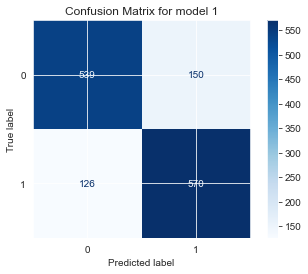

Test score for model 2: 0.7870036101083032
Precision for model 2: 0.7522012578616353
Recall for model 2: 0.8591954022988506
F1 for model 2: 0.8021462105969148


<Figure size 720x504 with 0 Axes>

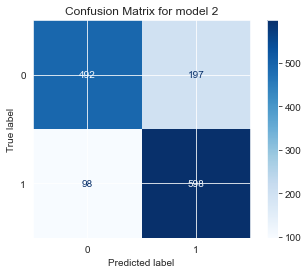

Test score for model 3: 0.8064981949458484
Precision for model 3: 0.7868632707774799
Recall for model 3: 0.8433908045977011
F1 for model 3: 0.8141470180305131


<Figure size 720x504 with 0 Axes>

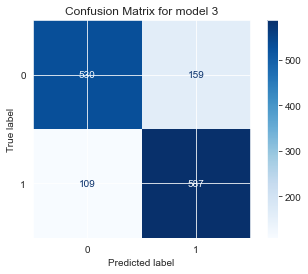

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score



plt.figure(figsize=(10, 7))
ConfusionMatrixDisplay.from_estimator(model1, X_test_scaled, y_test, cmap=plt.cm.Blues )  
plt.title('Confusion Matrix for model 1')
precision = precision_score(y_test, model1.predict(X_test_scaled))
recall = recall_score(y_test, model1.predict(X_test_scaled))
f1 = f1_score(y_test, model1.predict(X_test_scaled))
score = model1.score(X_test_scaled, y_test)
print('Test score for model 1:', score)
print('Precision for model 1:', precision)
print('Recall for model 1:', recall)
print('F1 for model 1:', f1)
plt.show()


plt.figure(figsize=(10, 7))
ConfusionMatrixDisplay.from_estimator(model2, X_test, y_test, cmap=plt.cm.Blues)  
plt.title('Confusion Matrix for model 2')
precision2 = precision_score(y_test, model2.predict(X_test))
recall2 = recall_score(y_test, model2.predict(X_test))
f2 = f1_score(y_test, model2.predict(X_test))
score = model2.score(X_test, y_test)
print('Test score for model 2:', score)
print('Precision for model 2:', precision2)
print('Recall for model 2:', recall2)
print('F1 for model 2:', f2)
plt.show()


plt.figure(figsize=(10, 7))
ConfusionMatrixDisplay.from_estimator(model3, X_test, y_test, cmap=plt.cm.Blues)  
plt.title('Confusion Matrix for model 3')
precision3 = precision_score(y_test, model3.predict(X_test))
recall3 = recall_score(y_test, model3.predict(X_test))
f3 = f1_score(y_test, model3.predict(X_test))
score = model3.score(X_test, y_test)
print('Test score for model 3:', score)
print('Precision for model 3:', precision3)
print('Recall for model 3:', recall3)
print('F1 for model 3:', f3)


plt.show()


1. Logistic Regression Model.
Model Development:
Data Preprocessing: The data is scaled using StandardScaler to ensure that all features contribute equally to the model's performance. This is crucial for logistic regression, especially when regularization is applied.
Model Initialization: LogisticRegression with C=1, penalty='l1', and solver='liblinear' is chosen. This setup indicates L1 regularization (which can lead to sparse solutions) and the liblinear solver, suitable for small datasets and binary classification problems.
Model Training: The scaled training data (X_train_scaled) and labels (y_train) are used to fit the model.
Model Validation:
Test Data Evaluation: The model's performance is evaluated using the scaled test data (X_test_scaled), and the accuracy score is reported. This step assesses how well the model generalizes to unseen data.
2. Decision Tree Classifier .
Model Development:
Model Initialization: DecisionTreeClassifier with criterion='entropy', max_depth=8, and min_samples_leaf=3. This configuration specifies the use of entropy for information gain, a maximum depth to prevent overfitting, and a minimum sample count for leaf nodes to ensure generalization.
Model Training: The model is trained using raw training data (X_train), as decision trees do not require feature scaling.
Model Validation:
Test Data Evaluation: The performance is evaluated on raw test data (X_test), with the accuracy score indicating the model's generalization ability.
3. Random Forest Classifier Training and Validation
Model Development:
Model Initialization: RandomForestClassifier with n_estimators=30, max_depth=9, and criterion='entropy'. This setup uses multiple decision trees to improve model robustness and reduce overfitting, with entropy for information gain and specified depth for complexity control.
Model Training: The model is trained with the raw training dataset.
Model Validation:
Test Data Evaluation: The model's accuracy is assessed on the test dataset, providing insights into its generalization capabilities.

For the model deployment we should first choose best scoring model based on scores provided(accuracy , f1 score, recall, ..)
For the future improvements , first we need to alter the data as said before 'trash in , trash out', means if fitted data is less understandable for model , the output also would be less accurate. Second thing to improve in project is tuning hyperparameters, as it is probably make better to learn data for a model 
 